<a href="https://colab.research.google.com/github/stgoa/recursiveseriation/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Optimal Algorithm for Strict Circular Seriation

Author: Santiago Armstrong

About this repository:

This repository contains a Python implementation of the algorithm introduced in the paper '*An Optimal Algorithm for Strict Circular Seriation*'. Check the preprint on [ArXiv][1]

**Abstract:**

We study the problem of circular seriation, where we are given a matrix of pairwise dissimilarities between n objects, and the goal is to find a *circular order* of the objects in a manner that is consistent with their dissimilarity. This problem is a generalization of the classical *linear seriation* problem where the goal is to find a *linear order*, and for which optimal $O(n^2)$ algorithms are known. Our contributions can be summarized as follows. First, we introduce *circular Robinson matrices* as the natural class of dissimilarity matrices for the circular seriation problem. Second, for the case of *strict circular Robinson dissimilarity matrices* we provide an optimal $O(n^2)$ algorithm for the circular seriation problem. Finally, we propose a statistical model to analyze the well-posedness of the circular seriation problem for large n. In particular, we establish $O(log(n)/n)$ rates on the distance between any circular ordering found by solving the circular seriation problem to the underlying order of the model, in the Kendall-tau metric.



[1]: https://arxiv.org/abs/2106.05944

If you want to run this in Google Colab, make sure to clone the repository:

    !git clone https://github.com/stgoa/recursiveseriation.git
    %cd recursiveseriation

In [1]:
%ls

example_points_in_circle.ipynb  minimal_example.ipynb


## Minimal example

In [2]:
from recursiveseriation.seriation import RecursiveSeriation
from recursiveseriation.utils import  (random_permutation, inpermute, permute, inversepermutation)
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
np.random.seed(42)

In [3]:

D =  [[0 , 1 , 3 , 5 , 6 , 7 , 7 , 6 , 5 , 4 , 3],
        [  1 , 0 , 2 , 4 , 5 , 6 , 7 , 7 , 6 , 5 , 4],
        [  3 , 2 , 0 , 1 , 4 , 5 , 6 , 7 , 7 , 6 , 5],
        [  5 , 4 , 1 , 0 , 1 , 4 , 5 , 6 , 7 , 7 , 6],
        [  6 , 5 , 4 , 1 , 0 , 1 , 4 , 5 , 6 , 7 , 7],
        [  7 , 6 , 5 , 4 , 1 , 0 , 3 , 4 , 5 , 6 , 7],
        [  7 , 7 , 6 , 5 , 4 , 3 , 0 , 1 , 4 , 5 , 6],
        [  6 , 7 , 7 , 6 , 5 , 4 , 1 , 0 , 2 , 4 , 5],
        [   5 , 6 , 7 , 7 , 6 , 5 , 4 , 2 , 0 , 1 , 4],
        [  4 , 5 , 6 , 7 , 7 , 6 , 5 , 4 , 1 , 0 , 1],
        [  3 , 4 , 5 , 6 , 7 , 7 , 6 , 5 , 4 , 1 , 0]]

D = np.asarray(D)
n = len(D)
pi = random_permutation(n)  # generate a random permutation
tau =inversepermutation(pi) # inverse of the unknown permutation
D = permute(D,pi) # permute the dissimilarity matrix by the random permutation

Text(0.5, 1.0, 'Randomly permuted dissimilarity matrix')

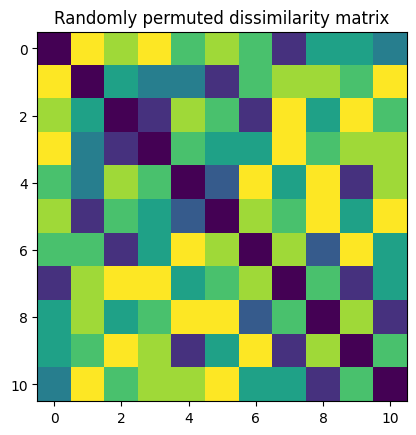

In [4]:
plt.imshow(D)
plt.title("Randomly permuted dissimilarity matrix")

In [5]:
print("Running algorithm...")

rs = RecursiveSeriation(dissimilarity=lambda x,y: D[x,y], n=n)
order = rs.sort()
print("Finished!")

Running algorithm...
Finished!


In [6]:
print("tau", tau)
print("recovered ordering", order)

tau [1, 5, 4, 9, 7, 0, 10, 8, 6, 2, 3]
recovered ordering [0, 7, 9, 4, 5, 1, 3, 2, 6, 8, 10]


Text(0.5, 1.0, 'Recovered dissimilarity matrix')

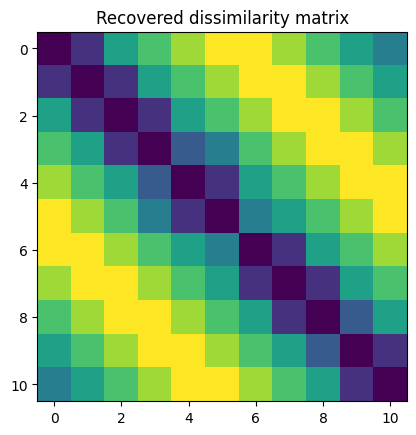

In [7]:
D_rec = permute(D,order)
plt.imshow(D_rec)
plt.title("Recovered dissimilarity matrix")